# Clustering Coefficient
Some social theories consider triads essential units of social network analysis. Clustering coefficient - a measure of the prevalence of triangles in an egocentric network - is the fraction of possible triangles that contain the ego node and exist. This measure is not applicable for directed graphs.

If the clustering coefficient of a network is 1. That means the network is a complete graph. If the clustering coefficient is 0, it indicates the network is a star. Clustering coefficient is another measure of stardom.
**使用clusering coefficient识别不同社区发现的Stardom程度？**

The average clustering coefficient is not to be confused with clustering coefficient of the whole network - the fraction of all possible triangles that exist in the network. The latter is known as transitivity. The discrepancy between the above 2 alternative measures of the "stardom" exists in a considerable proportion of nodes with few neighbors. For such nodes, the local clustering coefficient is traditionally high.

# Think in Terms of Paths
- A **walk** in a network is any sequence of edges such that the end of one edge is always the beginning of another, except possibly for the first and last ones that may be connected only at one end;
- A **trail** is a walk that never uses the same edge twice. 
- A **path** is a trail that never visits the same node twice (i.e., it does not intersect itself; Networkx refers to paths as "simple paths").

Two nodes in a network are often connected with more than one path. The shortest paths are called geodesics.

# Networks as Circles
The **Eccentricity** is the maximum distance from a node to all other nodes in the network.
- **Diameter** of a network is the maximal eccentricity;
- **Radius** of a network the the minimal eccentricity;
- **Center** of a network is a set of all nodes whose eccentricity equals the radius;
- **Periphery** of a network is a set of all nodes whose eccentricity equals the diameter.

# Choose the Right Centralities
## Degree Centrality
The simplest centrality measure is a node degree (also indegree and outdegree, whenever necessary). Intuitively, a node with more edges, representing, say, an actor with more ties, is more important than a node with only one edge.
## Closeness and Harmonic Closeness Centrality
The closeness centrality is defined as the reciprocal mean distance (length of the geodesics) from a node to all other reachable nodes in the network.
Another way to quantify the sense of closeness is to look at the mean reciprocal distance (as opposed to the reciprocal mean distance; the order of the sum and reciprocal operations reverses). Such measure is called harmonic centrality.
## Betweenness Centrality
Betweenness centrality measures the fraction of all possible geodesics that pass through a node.
## Eigenvector Centrality
Mathematically, the eigenvector centrality of a node is the sum of the neighbors’ eigenvector centralities divided by λ—the largest
eigenvalue of the adjacency matrix of the network.
## PageRank
At least two more types of centralities are based on recursive principles similar to the eigenvector centrality: PageRank and HITS.
The web pages are represented by nodes in a directed graph. The graph edges correspond to hyperlinks. The rank of a node (and the corresponding page) in the network is calculated as the probability that a person randomly traversing the edges (clicking on links) will arrive at the node (page). The algorithm is parametrized by the damping factor alpha=0.85, which is the probability that the user will continue clicking.
## HITS Hubs and Authorities
The HITS (Hyperlink-Induced Topic Search) algorithm is an extended version of PageRank. PageRank considers all graph nodes as potential terminals, or “sinks.” Once you get into a sink, you likely get sunk. 
You want to study a network from the opposite perspective: what is the probability that a person randomly traversing the edges has started at the node? HITS algorithm gets both hubs and authorities values. Authorities are a loose counterpart of the PageRank. Hubs
considers outgoing links instead of incoming links. They serve as entry points into your network so that you could get to the authorities most efficiently.


In [62]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random

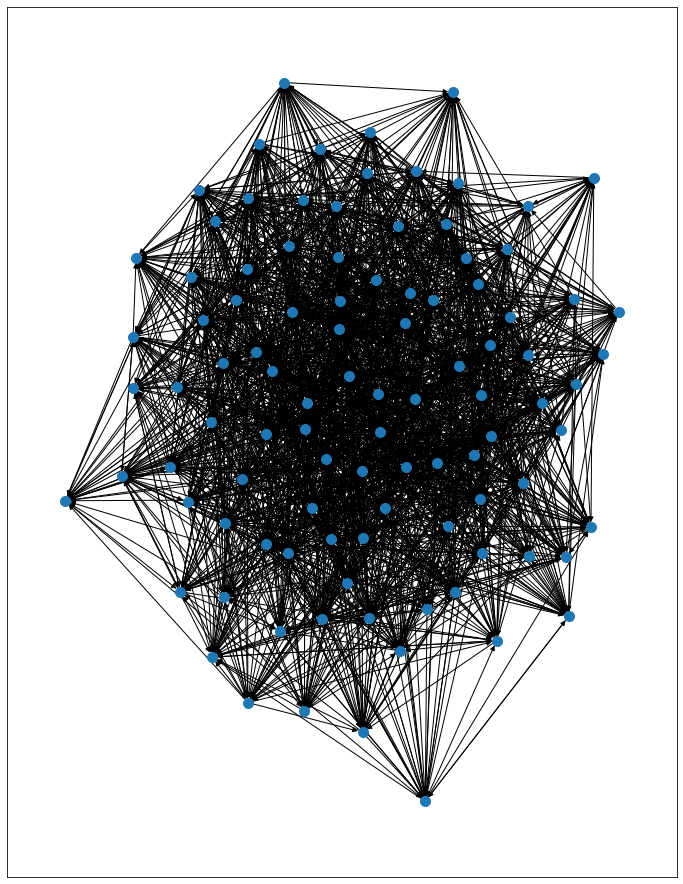

In [63]:
# construct a toy graph to play with
G = nx.erdos_renyi_graph(100,0.2, directed = True)
fig, ax = plt.subplots(figsize = (12,16))
nx.draw_networkx(G, node_size = 100, with_labels = False)

In [64]:
# compare the 8 mentioned centralities
dgr = nx.degree_centrality(G)
clo = nx.closeness_centrality(G)
har = nx.harmonic_centrality(G)
eig = nx.eigenvector_centrality(G)
bet = nx.betweenness_centrality(G)
pgr = nx.pagerank(G)
hits = nx.hits(G)

centralities = pd.concat([pd.Series(c) for c in (hits[1], eig, pgr, har, clo, hits[0], dgr, bet)],axis=1)
centralities.columns = ("Authorities", "Eigenvector", "PageRank","Harmonic Closeness", "Closeness", "Hubs","Degree", "Betweenness")
centralities["Harmonic Closeness"] /= centralities.shape[0]

In [65]:
# Calculate the correlations for each pair of centrailities
c_df = centralities.corr()
# drop the duplicate values and reorganize the dataframe
ll_triangle = np.tri(c_df.shape[0], k=-1)
c_df *= ll_triangle
c_df.stack().sort_values(ascending = False)

Closeness           Harmonic Closeness    0.990550
Harmonic Closeness  Eigenvector           0.980233
                    Authorities           0.972213
PageRank            Eigenvector           0.971987
Closeness           Eigenvector           0.966605
                                            ...   
Harmonic Closeness  Harmonic Closeness    0.000000
PageRank            Betweenness           0.000000
                    Degree                0.000000
Authorities         Authorities           0.000000
Hubs                Authorities          -0.004101
Length: 64, dtype: float64

The complete analysis of all correlations reveals that the centrality measures form two groups. 
- The first group consists of eigenvector and harmonic closeness centralities, PageRank, and authorities;
- The second group has two subgroups: degree and betweenness centralities in one, and closeness and hubs in the other.

<AxesSubplot:xlabel='Harmonic Closeness', ylabel='Eigenvector'>

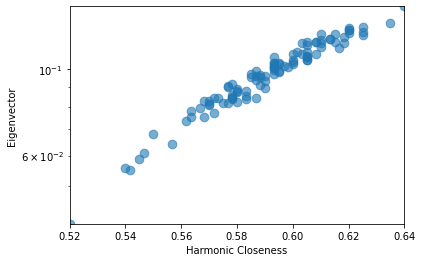

In [66]:
X = "Harmonic Closeness"
Y = "Eigenvector"
limits = pd.concat([centralities[[X, Y]].min(),
centralities[[X, Y]].max()], axis=1).values
centralities.plot(kind="scatter", x=X, y=Y, xlim=limits[0], ylim=limits[1],
s=75, logy=True, alpha=0.6)

# Estimate Network Uniformity Through Assortativity
Attribute analysis looks into **assortativity**: correlation between the values of a node attribute across edges. A network with positively correlated attributes is called assortative; in an assortative network, nodes tend to connect to nodes with similar attribute values. The tendency is called assortative mixing. A dissortative (negatively correlated) network is the opposite of an assortative one.

- **nx.average_degree_connectivity()** returns a dictionary with unique node degrees as keys and matching average neighbors’degrees as values.

- **nx.attribute_mixing_matrix()** takes a graph, an attribute name, and an optional mapping dictionary, and returns a two-dimensional NumPy array. The ith row and jth column of the array contain the fraction of adjacent nodes that have the ith and jth values of the attribute, respectively.

- **nx.attribute_assortativity_coefficient()**, confirms the previous result. The function returns the assortativity coefficient—the correlation between the values of an attribute across edges.

my_degree, their_degree = zip(*nx.average_degree_connectivity(G).items())